In [9]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy as sc;
from scipy import stats
import math as m
from math import pi as pi

def Mesh(argument,N,Nfun):
    if Nfun == 4:
        Include=-0.001;
    else:
        Include=0.001;
    L_max=1+Include
    dx=(L_max-abs(Include))/(N-1)
    arr=np.arange(0,L_max,dx)
    switcher = {
        1: arr,
        2: 0.5*(1-np.cos(pi*arr)),
        3: 0.5+np.arcsin(2*arr-1)/pi,
    }
    return switcher.get(argument, "nothing")
def Func(x,argument):
    switcher = {
        1: 1.0/(1+x**2),
        2: (x-0.5)**2*np.sign(x-0.5),
        3: np.abs(x-0.5),
        4: np.sqrt(1-x**2),
        5: np.sin(x*pi),
        6: 1.0/(1+a_par*x**2),
    }
    return switcher.get(argument, "nothing")   
def DFunc(x,argument):
    switcher = {
        1: -2*x/(1+x**2)**2,
        2: 2*(x-0.5)*np.sign(x-0.5),
        3: np.sign(x-0.5),
        4: -x/np.sqrt(1.0-x**2),
        5: np.cos(x*pi)*pi,
        6:-2*a_par*x/(1+a_par*x**2)**2,
    }
    return switcher.get(argument, "nothing") 

def Lagrange(x_arr,j,i,x,N_pol):
    L=1;
    for k in range(j-N_pol/2,j+N_pol/2+1):
        if k != i:
            L*=(x-x_arr[k])/(x_arr[i]-x_arr[k])
    return L;
def DLagrange(x_arr,j,i,x,N_pol): 
    Lag=Lagrange(x_arr,j,i,x,N_pol);
    if Lag == 0.0:
        return 0
    L=0;
    for k in range(j-N_pol/2,j+N_pol/2+1):
        if k != i:
            L+=1.0/(x-x_arr[k])
    return L*Lag
def find_nearest(a, a0):
    idx = np.abs(a - a0).argmin()
    return idx
def f_inter(x_arr,y_arr,x,N_pol):
    j=find_nearest(x_arr,x);
    size=x_arr.size;
    j=min(max(j,N_pol/2),(size-1)-N_pol/2)
    L=0;
    for i in range(j-N_pol/2,j+N_pol/2+1):
        #if i>=0 and i<=size-1:
        L+=y_arr[i]*Lagrange(x_arr,j,i,x,N_pol)
    return L

def Hermite(x_arr,y_arr,dy_arr,x,N_pol):
    j=find_nearest(x_arr,x);
    size=x_arr.size;
    j=min(max(j,N_pol/2),(size-1)-N_pol/2)
    L=0;
    for i in range(j-N_pol/2,j+N_pol/2+1):
        if i>=0 and i<=size-1:
            #print 'i=',i,'j=',j,'N_pol=',N_pol,'size',size,'y_arr.size',y_arr.size,'dy_arr.size',dy_arr.size
            Lagr=Lagrange(x_arr,j,i,x,N_pol)
            DLagr=DLagrange(x_arr,j,i,x_arr[i],N_pol)
            #print 'Lagr=',Lagr,'DLagr=',DLagr,'x=',x
            L+=(y_arr[i]*(1.0-2.0*DLagr*(x-x_arr[i]))*Lagr**2+ dy_arr[i]*(x-x_arr[i])*Lagr**2)
    return L;

def Error (x_arr,y_arr,y_exact):
    sum=0;
    for i in range(0,x_arr.size-1):
        sum+=abs(y_arr[i]-y_exact[i])*(x_arr[i+1]-x_arr[i])
    return sum
Name_mesh={1:"Uniform",2:"Chebyshev",3:"Arcsin",}
Name_func={1:"1/(1+x^2)",
        2: "(x-0.5)^2*sign(x-0.5)",
        3: "|x-0.5|",
        4: "sqrt(1-x^2)",
        5: "sin(x*pi)",
        6: "1/(1+a_par*x^2)",}
meth_app={1:"Lagrange",
          2:"Hermite",}
def PlotFig(Nfun,Num,mesh,axarr,xrf,y_exactrf,meth,N_pol):
    k_max=len(Num)
    yrf=np.zeros(k_max,dtype=object)
    for k in xrange(0,k_max):
        N=Num[k];
        N_pol=N-1
        x=Mesh(mesh,N,Nfun);
        if x.size!=N:
            print ("Error in mesh setting")
            break;
        f=Func(x,Nfun);
        if meth==1:
            yrf[k]=np.asarray(map(lambda x1 : f_inter(x,f,x1,N_pol), xrf))
        else:            
            df=DFunc(x,Nfun);
            yrf[k]=map(lambda x1 : Hermite(x,f,df,x1,N_pol), xrf)
            #print 'f=',f,' df=',df,' x=',x,' yrf_k',yrf[k]
        num_graph=4*(mesh-1)+k
        i=k;
        j=mesh-1;
        name=" f(x)="+Name_func[Nfun]+",\n mesh="+Name_mesh[mesh]+", \n point number="+str(N)
        axarr[i, j].set_title(meth_app[meth]+name);
        axarr[i, j].plot(xrf,yrf[k],'b-',xrf,y_exactrf,'r--');
        axarr[i, j].legend([meth_app[meth],"Exact"])
        #print meth_app[meth]+name
        #print x,f
    
def PlotFigs(Nfun,meth,Num,N_pol): 
    xrf=np.arange(0,1.001,0.01);
    y_exactrf=Func(xrf,Nfun);
  
    #Validation
    #pol=sc.interpolate.lagrange(x, f)
    #yrf_Val=map(lambda x1 : pol(x1), xrf)
    
    plt.close('all')

    # Four axes, returned as a 2-d array
    f, axarr = plt.subplots(4, 3)
    f.set_size_inches(15,20)
    for mesh in xrange(1,4):
        PlotFig(Nfun,Num,mesh,axarr,xrf,y_exactrf,meth,N_pol)

    # Fine-tune figure; make subplots farther from each other.
    plt.subplots_adjust(hspace=0.7,wspace=0.2)
    #plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.5)

    #plt.savefig(str(meth)+str(Nfun)+'.png', format='png')
    plt.savefig(str(meth)+str(Nfun)+'.eps', format='eps', dpi=1000)
    plt.show()

Lagrange f(x)=(x-0.5)^2*sign(x-0.5), mesh=Uniform, 
 point number=20


<ipython-input-9-b9a88ba5cd9e>:37: RuntimeWarning: divide by zero encountered in true_divide
  4: -x/np.sqrt(1.0-x**2),


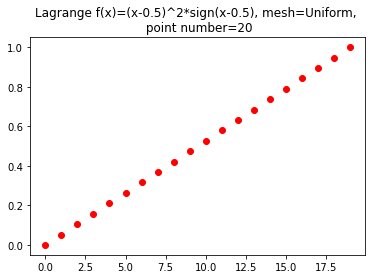

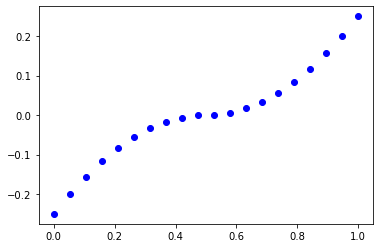

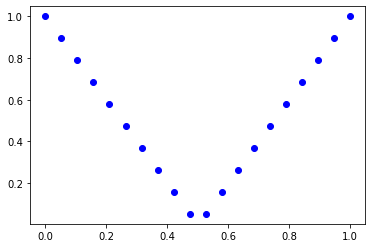

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [10]:
N=20;
N_pol=N-1;
mesh=1;
Nfun=2;
N_min=5;i_max=60;N_step=1;
a_par=25;

x=Mesh(mesh,N,Nfun);
f=Func(x,Nfun);
df=DFunc(x,Nfun);
plt.close('all')
plt.plot(x,'ro')
name="Lagrange f(x)="+Name_func[Nfun]+", mesh="+Name_mesh[mesh]+", \n point number="+str(N)
print (name)
plt.title(name)
plt.show()
plt.plot(x,f,'bo')
plt.show()
plt.plot(x,df,'bo')
plt.show()
x

20


RuntimeError: matplotlib does not support generators as input

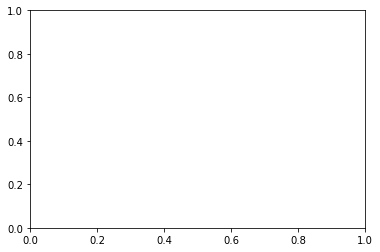

In [11]:
print (N)
xrf=np.arange(0,1.001,0.1);
yrf_Lag=map(lambda x1 : f_inter(x,f,x1,N_pol), xrf)
yrf_Herm=map(lambda x1 : Hermite(x,f,df,x1,N_pol), xrf)
#Validation
#pol=sc.interpolate.lagrange(x, f)
#yrf_Val=map(lambda x1 : pol(x1), xrf)
name="f(x)="+Name_func[Nfun]+", mesh="+Name_mesh[mesh]+", \n point number="+str(N)
plt.plot(xrf,yrf_Lag,'b-',xrf,Func(xrf,Nfun),'r--')
plt.legend(["Lagrange","Exact"])
plt.title("Lagrange "+name)
plt.show()

plt.plot(xrf,yrf_Herm,xrf,Func(xrf,Nfun),'r--')
plt.legend(["Hermite","Exact"])
plt.title("Hermite "+name)
plt.show()

plt.plot(xrf,yrf_Lag,xrf,yrf_Herm,'g-.',xrf,Func(xrf,Nfun),'r--')
plt.legend(["Lagrange","Hermite","Exact"])
plt.title("All together "+name)
plt.show()

#plt.plot(xrf,yrf_Lag,'b-',xrf,Func(xrf,Nfun),'r--',xrf,yrf_Val,'g-')
#plt.legend(["Lagrange","Exact"])
#plt.title("Lagrange "+name)
#plt.show()


In [14]:
xrf,yrf_Lag,Func(xrf,Nfun)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array(<map object at 0x7fe95e4dddc0>, dtype=object),
 array([1.        , 0.99498744, 0.9797959 , 0.9539392 , 0.91651514,
        0.8660254 , 0.8       , 0.71414284, 0.6       , 0.43588989,
        0.        ]))

In [18]:
list(yrf_Lag)

TypeError: iteration over a 0-d array

In [12]:
mesh=3;
Nfun=4;
error_Lag=np.zeros(0);
error_Herm=np.zeros(0);
N_arr=np.zeros(0);
for i in range(1, i_max):
    N=i*N_step+N_min;
    N_pol=N-1
    x=Mesh(mesh,N,Nfun);
    f=Func(x,Nfun);
    df=DFunc(x,Nfun);
    
    xrf=np.arange(0,1.0001,0.1);
    y_exactrf=Func(xrf,Nfun);    
    yrf_Lag=np.asarray(map(lambda x1 : f_inter(x,f,x1,N_pol), xrf))
    yrf_Herm=map(lambda x1 : Hermite(x,f,df,x1,N_pol), xrf)
    
    N_arr=np.append(N_arr,N)
    #error_Lag=np.append(error_Lag,np.abs(np.asarray(yrf_Lag) - y_exactrf).sum() )  
    #error_Lag=np.append(error_Lag,max(np.abs(np.asarray(yrf_Lag) - y_exactrf) ) )
    #error_Herm=np.append(error_Herm,np.abs(np.asarray(yrf_Herm) - y_exactrf).sum() )
    #error_Herm=np.append(error_Herm,max(np.abs(np.asarray(yrf_Herm) - y_exactrf) ))
    
    error_Lag=np.append(error_Lag,Error (xrf,yrf_Lag,y_exactrf) )
    error_Herm=np.append(error_Herm,Error (xrf,yrf_Herm,y_exactrf) )

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [13]:
name='\n mesh='+Name_mesh[mesh]+" f(x)="+Name_func[Nfun]

#plt.plot(np.log(N_arr),np.log(error_Lag),'ro')
#plt.title('loglog scale: error vs N, Lagrange interpolation'+name);
#plt.grid(True)
#plt.savefig('Convergence1'+str(mesh)+str(Nfun)+'.eps', format='eps', dpi=1000)
#plt.show()

#plt.plot(np.log(N_arr),np.log(error_Herm),'ro')
#plt.grid(True)
#plt.title('loglog scale: error vs N, Hermite interpolation'+name);
#plt.savefig('Convergence2'+str(mesh)+str(Nfun)+'.eps', format='eps', dpi=1000)
#plt.show()



p1=0;q1=11;
p2=0;q2=11;
slope_Lag, intercept_Lag, r_value_Lag, p_value_Lag, std_err_Lag = stats.linregress(np.log(N_arr[p1:q1]),np.log(error_Lag[p1:q1]))
print ('slope_Lag=',slope_Lag,'r_value_Lag=',r_value_Lag)

slope_Herm, intercept_Herm, r_value_Herm, p_value_Herm, std_err_Herm = stats.linregress(np.log(N_arr[p2:q2]),np.log(error_Herm[p2:q2]))
print ('slope_Herm=',slope_Herm,'r_value_Herm=',r_value_Herm)

name='\n mesh='+Name_mesh[mesh]+" f(x)="+Name_func[Nfun]+" \n slope_L="+str(round(slope_Lag,2))+" slope_H="+str(round(slope_Herm,2))
#plt.figure(figsize=15)
plt.figure(figsize=(5, 5), dpi=1000)
plt.plot(np.log(N_arr),np.log(error_Lag),'ro',np.log(N_arr),np.log(error_Herm),'go')
plt.grid(True)
plt.legend(["Lagrange","Hermite"])
plt.title('loglog scale: error vs N, Lagrange, Hermite interpolation'+name);
plt.savefig('ConvergenceAll'+str(mesh)+str(Nfun)+'.eps', format='eps', dpi=1000)
plt.show()

ValueError: Inputs must not be empty.

In [198]:
pol=sc.interpolate.lagrange(x, f)
pol(0.5)

-4.1404143252521632e+17

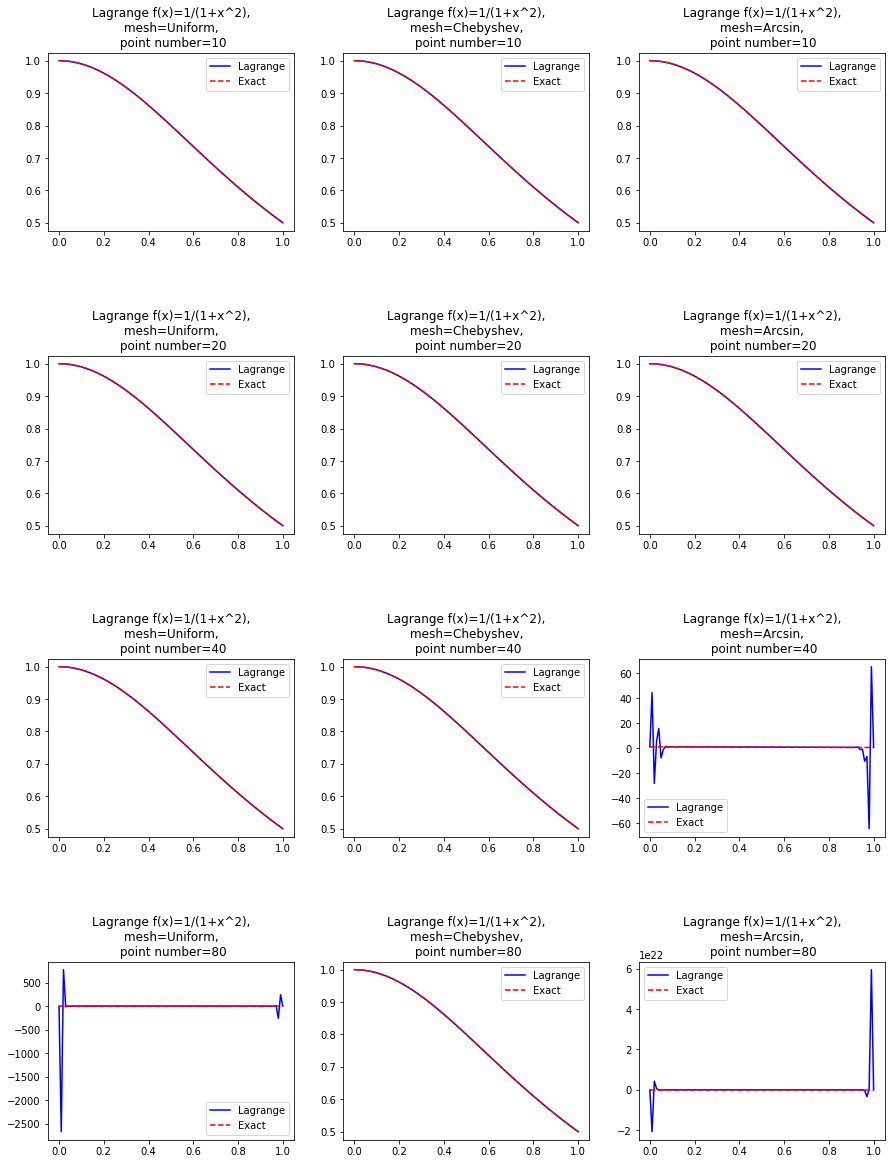

/Users/weugene/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in divide


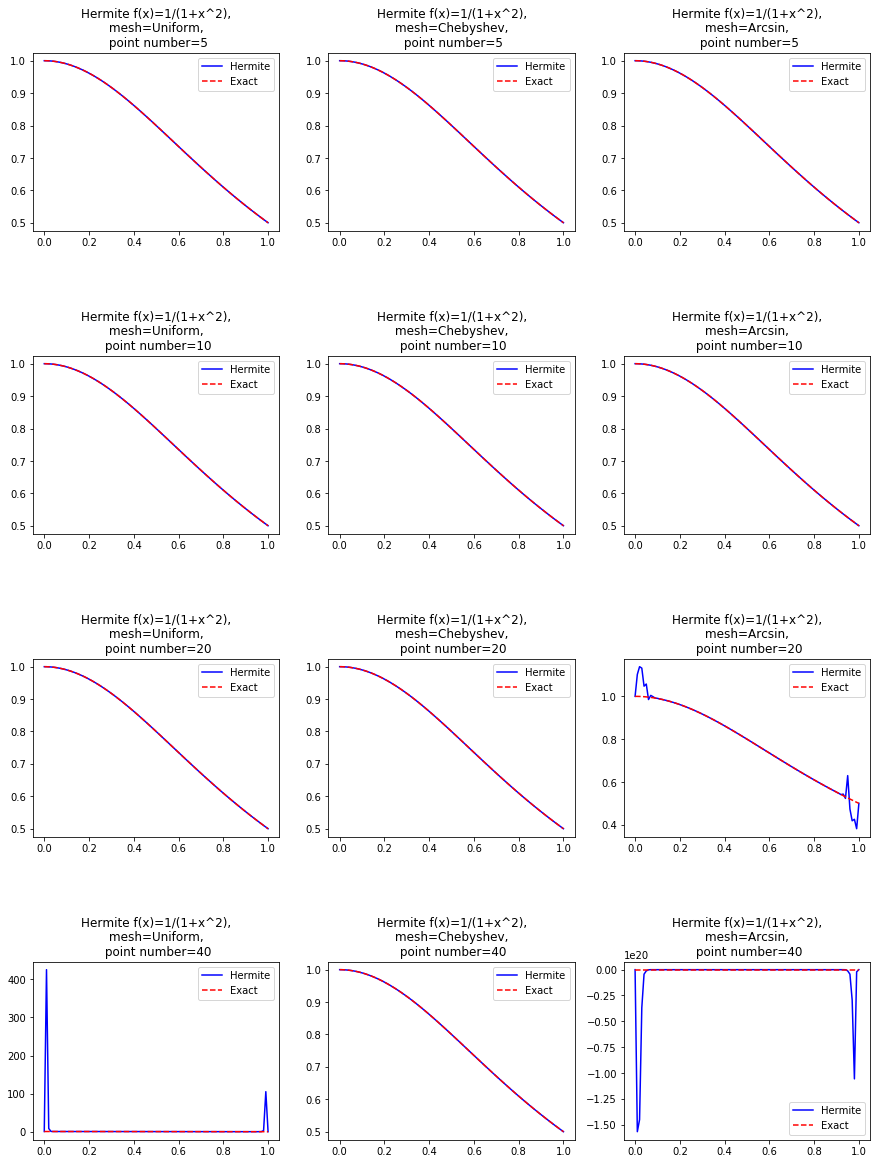

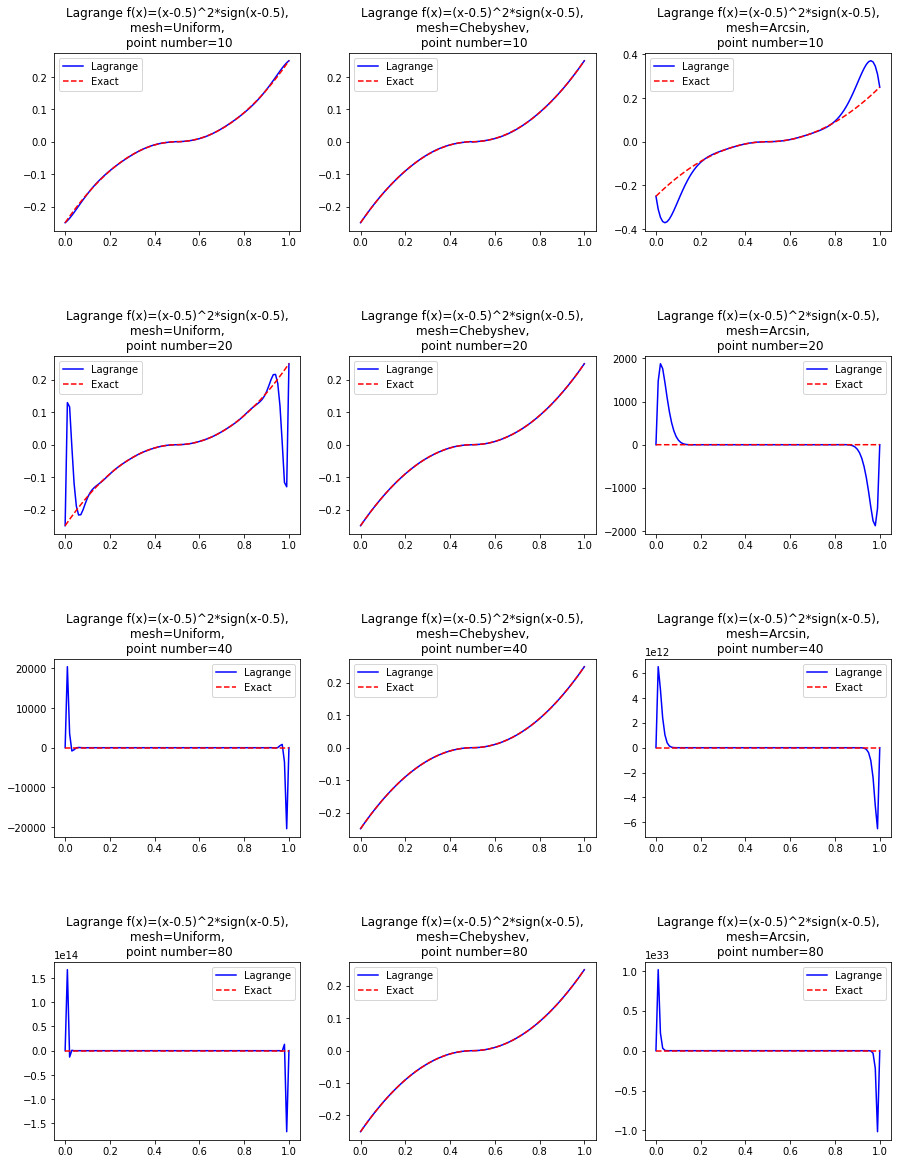

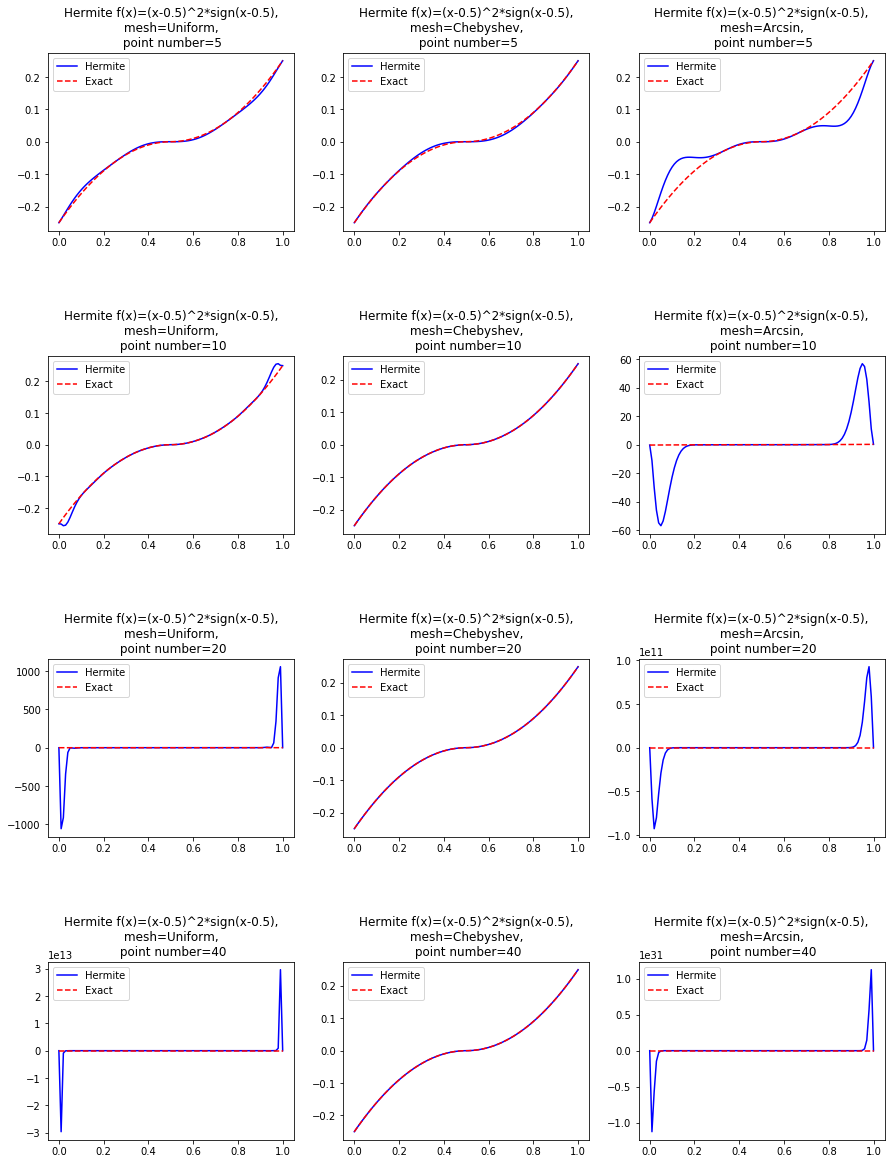

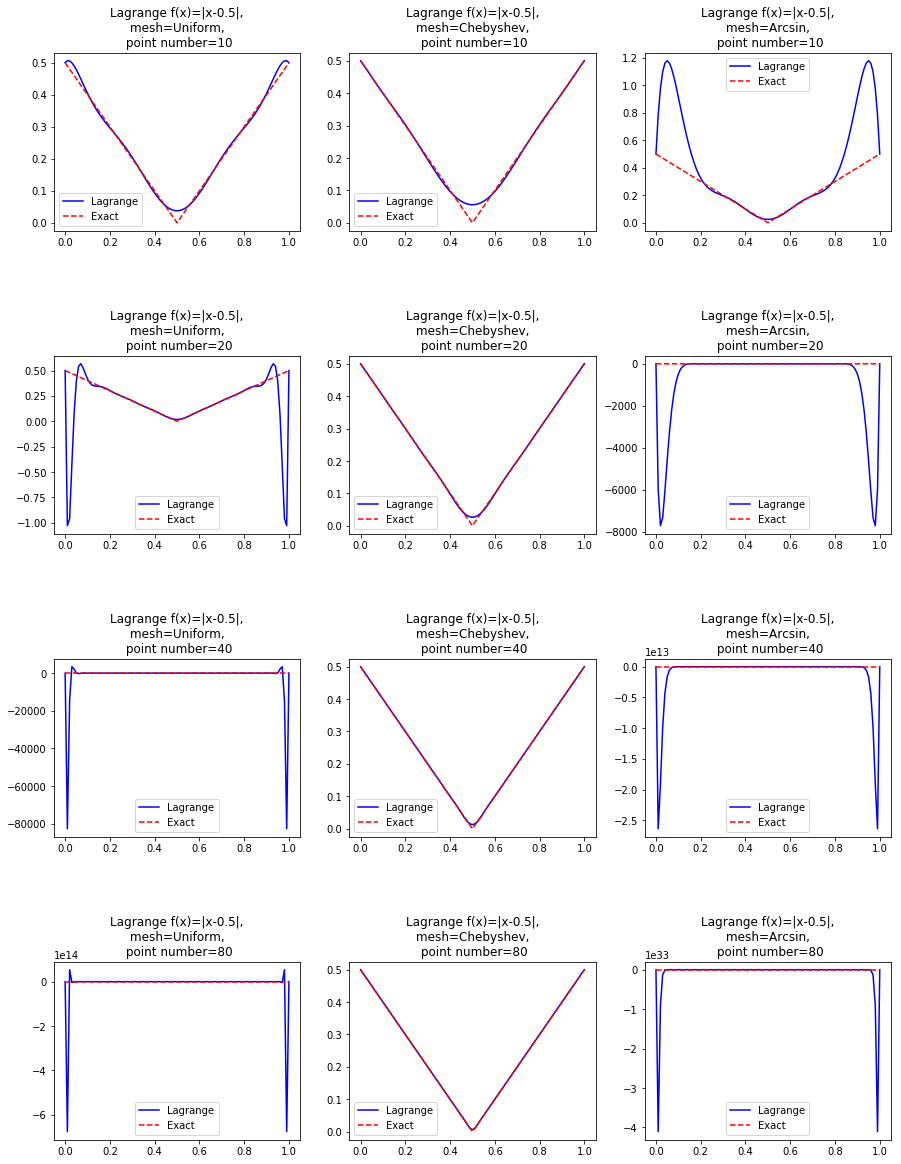

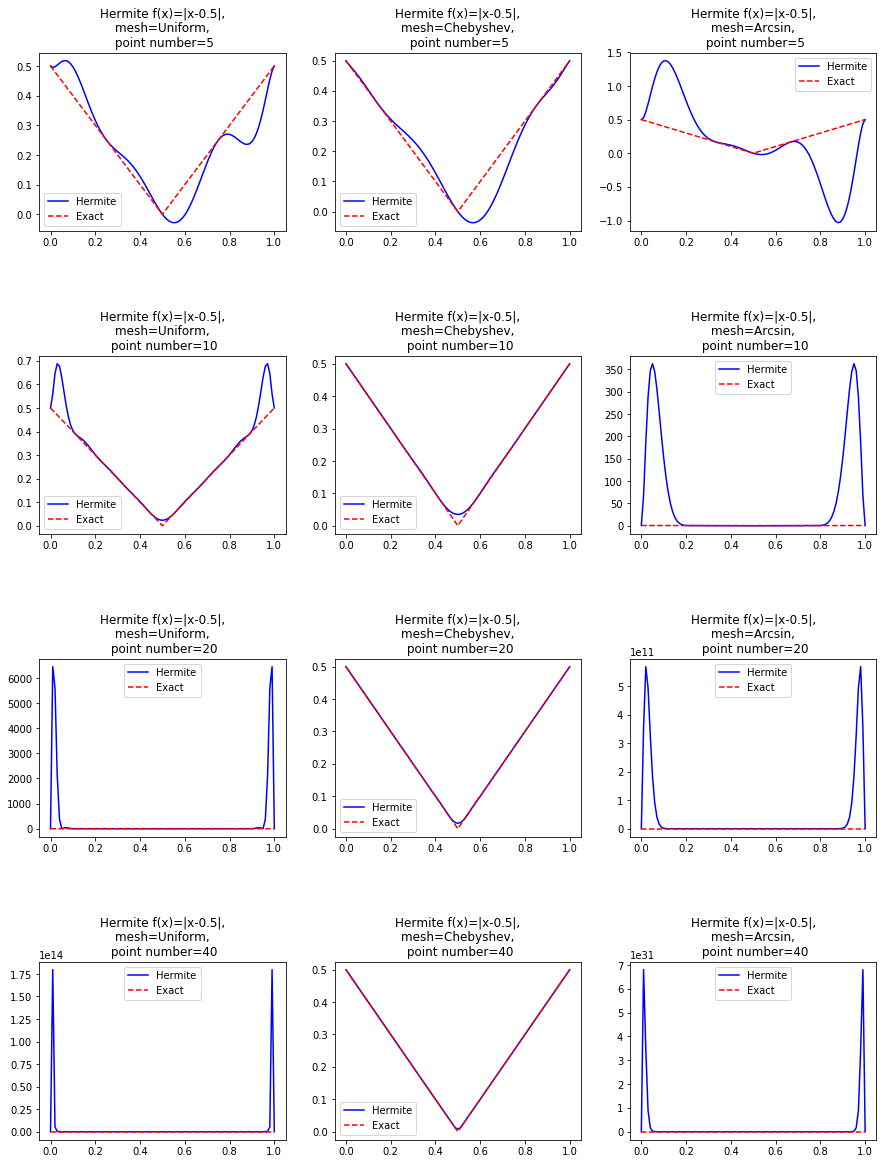

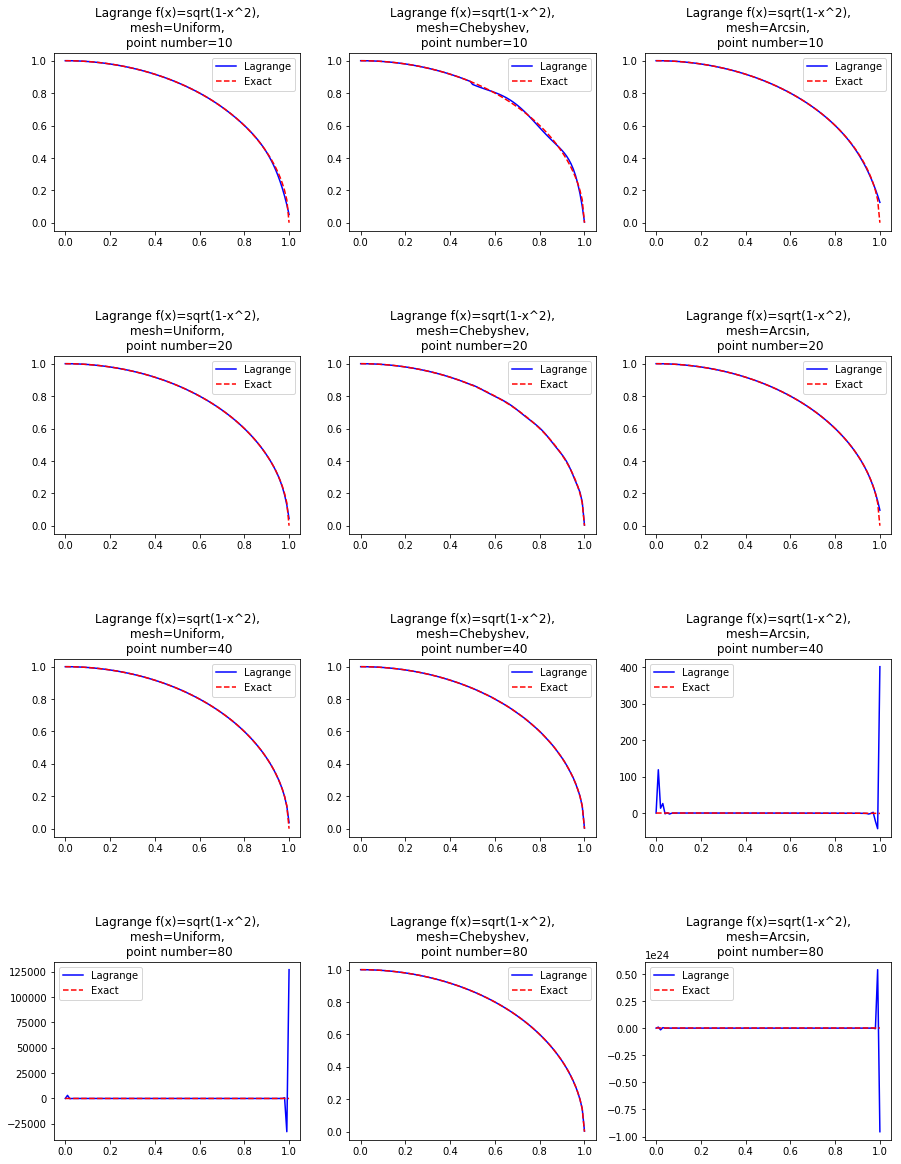

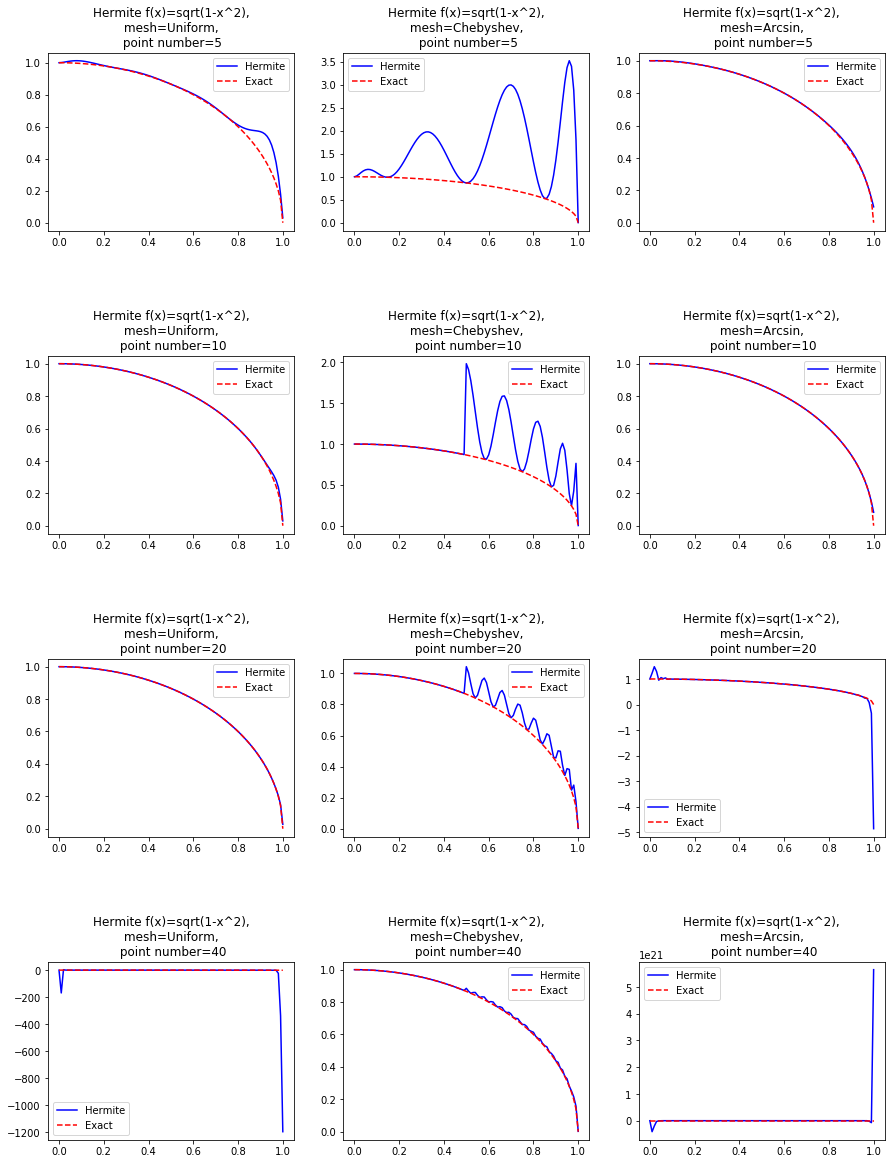

In [115]:
PlotFigs(1,1,[10,20,40,80],N_pol)
PlotFigs(1,2,[5,10,20,40],N_pol)
PlotFigs(2,1,[10,20,40,80],N_pol)
PlotFigs(2,2,[5,10,20,40],N_pol)
PlotFigs(3,1,[10,20,40,80],N_pol)
PlotFigs(3,2,[5,10,20,40],N_pol)
PlotFigs(4,1,[10,20,40,80],N_pol)
PlotFigs(4,2,[5,10,20,40],N_pol)

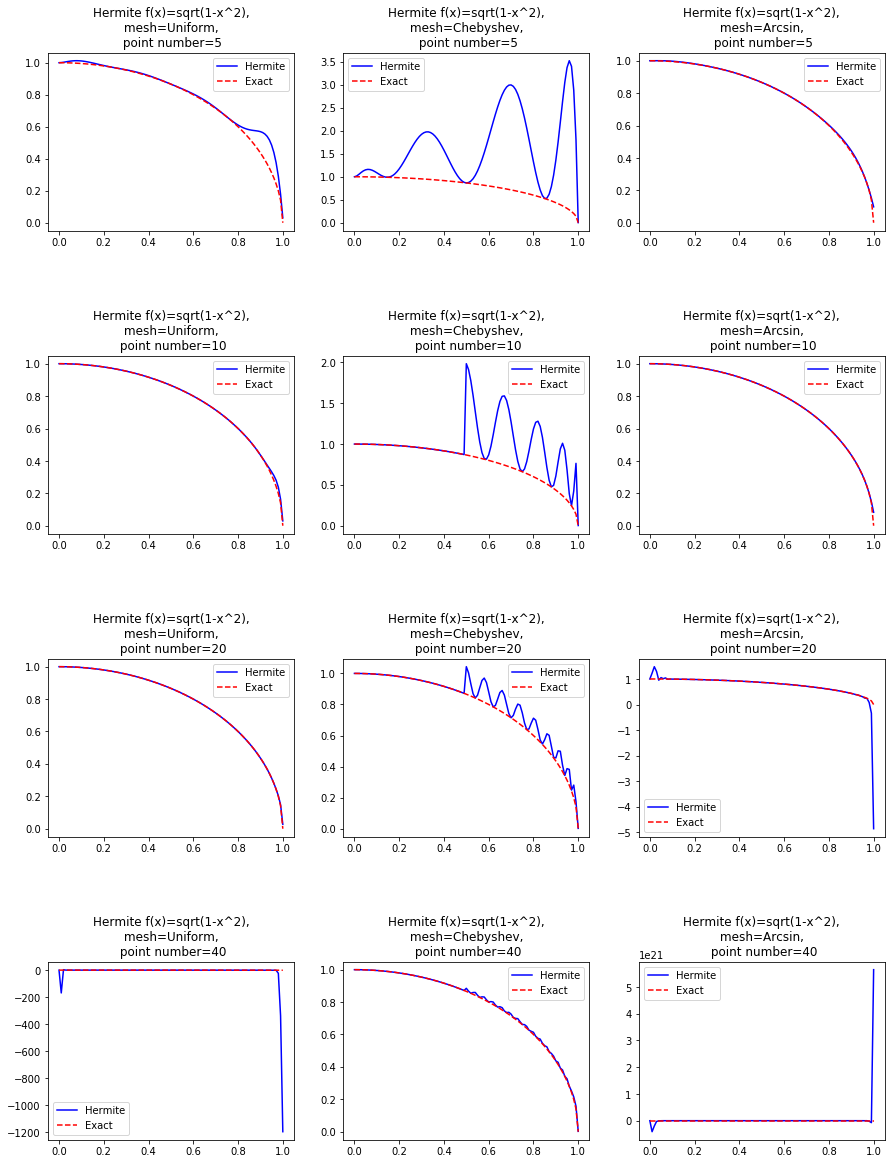

In [114]:
PlotFigs(4,2,[5,10,20,40],N_pol)

In [ ]:
errror